In [2]:
# import libraries for data manipulation

import pandas as pd

# Let's read VIIRS csv sample data set into a DataFrame df

df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# show how many rows (records) and columns (values per record) we have

print ('FIRMS sample fire data contains %i rows and %i columns' % (df.shape[0], df.shape[1]))
df.shape

FIRMS sample fire data contains 74605 rows and 14 columns


(74605, 14)

In [3]:
df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N
3,2.15681,13.94618,319.05,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,288.77,1.81,N
4,2.15754,13.94131,301.13,0.51,0.50,2023-07-12,3,N,VIIRS,n,2.0NRT,288.17,1.81,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74600,61.42408,-110.40578,350.48,0.40,0.40,2023-07-12,1950,N,VIIRS,n,2.0URT,309.39,16.01,D
74601,61.42510,-110.39867,336.03,0.40,0.40,2023-07-12,1950,N,VIIRS,l,2.0URT,308.08,32.98,D
74602,61.42733,-110.40780,328.53,0.40,0.40,2023-07-12,1950,N,VIIRS,n,2.0URT,298.15,16.01,D
74603,61.42834,-110.40069,338.45,0.40,0.40,2023-07-12,1950,N,VIIRS,n,2.0URT,302.81,32.98,D


In [4]:
df.describe

<bound method NDFrame.describe of        latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0       0.05836   29.59085      295.64  0.38   0.59  2023-07-12         3   
1       0.48765   31.50760      296.73  0.51   0.66  2023-07-12         3   
2       2.15227   13.94524      305.26  0.51   0.49  2023-07-12         3   
3       2.15681   13.94618      319.05  0.51   0.49  2023-07-12         3   
4       2.15754   13.94131      301.13  0.51   0.50  2023-07-12         3   
...         ...        ...         ...   ...    ...         ...       ...   
74600  61.42408 -110.40578      350.48  0.40   0.40  2023-07-12      1950   
74601  61.42510 -110.39867      336.03  0.40   0.40  2023-07-12      1950   
74602  61.42733 -110.40780      328.53  0.40   0.40  2023-07-12      1950   
74603  61.42834 -110.40069      338.45  0.40   0.40  2023-07-12      1950   
74604  61.42936 -110.39356      339.52  0.40   0.40  2023-07-12      1950   

      satellite instrument confidence ver

In [5]:
# we need to install some libraries as they are not default on the system
!pip install geodatasets cartopy
!pip install geopandas
import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

  Using cached geodatasets-2026.1.0-py3-none-any.whl.metadata (5.5 kB)
  Using cached cartopy-0.25.0-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached pyshp-3.0.3-py3-none-any.whl.metadata (65 kB)
Using cached geodatasets-2026.1.0-py3-none-any.whl (22 kB)
Using cached cartopy-0.25.0-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached pyshp-3.0.3-py3-none-any.whl (58 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)

   ---------- ----------------------------- 1/4 [pooch]
   ---------- ----------------------------- 1/4 [pooch]
   -------------------- ------------------- 2/4 [geodatasets]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3/4 [cartopy]
   ------------------------------ --------- 3

<Axes: >

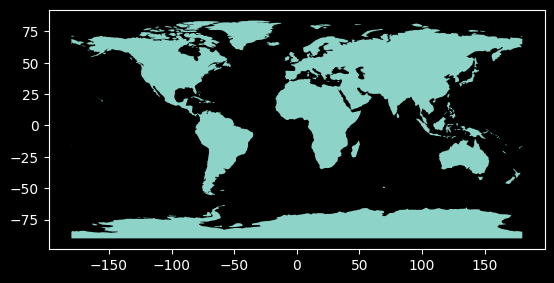

In [6]:
# let's get our basic earth data

path = get_path("naturalearth.land")
world = geopandas.read_file(path)

# and test our libraries loaded

world.plot()

In [7]:
# now convert latitude, longitude values into point geometry

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# show top 3 records
gdf.head(3)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,geometry
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N,POINT (29.59085 0.05836)
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N,POINT (31.5076 0.48765)
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N,POINT (13.94524 2.15227)


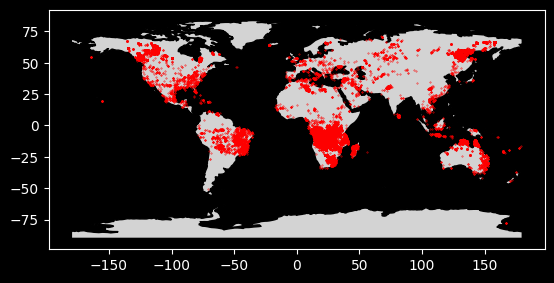

In [8]:
# optional: set outline and fill colors
ax = world.plot(color="lightgrey", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=0.1)

plt.show()

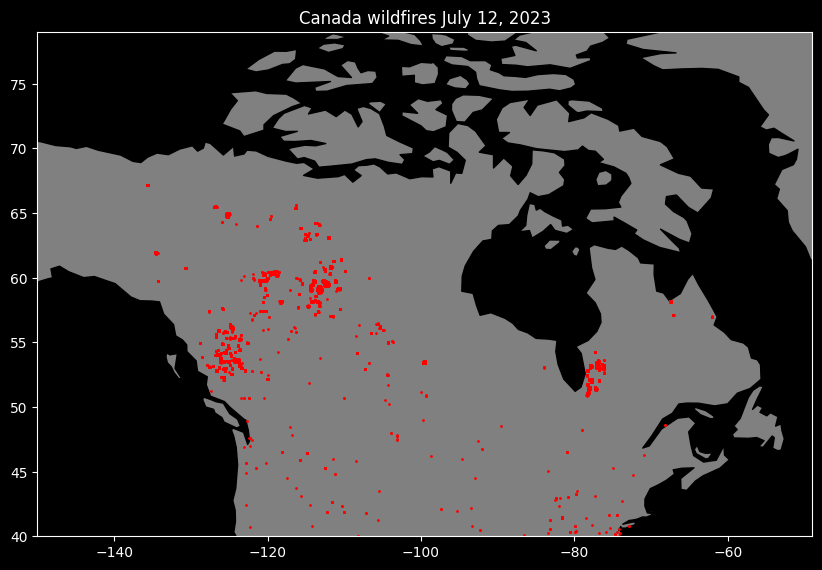

In [9]:
# create Canada subset

df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()

# create geometry for points using latitude and longitude and specifying projection as EPSG:4326

gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)

# set our extent
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Canada wildfires July 12, 2023')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=1)

plt.show()


In [10]:
!pip install geopandas
import geopandas

In [20]:
import os
import pandas as pd
import requests
from dotenv import load_dotenv

load_dotenv()
MAP_KEY = os.getenv('MAP_KEY') 

if not MAP_KEY:
    raise ValueError("MAP_KEY not found in .env file. Get one from https://firms.modaps.eosdis.nasa.gov/api/")


REGION_BBOX = {
    "india": {
        "up": "77.1,23.5,84.5,31.5",
        "mp": "74.0,21.0,82.0,26.0",
        "maharashtra": "72.5,17.0,80.0,22.0",
    },
}

def fetch_firms_data(country: str, state: str, source="VIIRS_SNPP_NRT", day_range=3):
    """
    Fetch FIRMS fire data for a country/state bounding box.
    
    Returns: pandas DataFrame with only necessary fields
    """
    country = country.lower()
    state = state.lower()

    if country not in REGION_BBOX or state not in REGION_BBOX[country]:
        raise ValueError(f"Bounding box not found for {country} / {state}")

    area = REGION_BBOX[country][state]
    base_url = "https://firms.modaps.eosdis.nasa.gov"  
    url = f"{base_url}/api/area/csv/{MAP_KEY}/{source}/{area}/{day_range}"

    print(f"Fetching FIRMS data from: {url}")

    response = requests.get(url)
    if response.status_code != 200:
        raise ConnectionError(f"Error fetching data: {response.status_code} - {response.text}")

    temp_file = "firms_temp.txt"
    with open(temp_file, "wb") as f:
        f.write(response.content)

    try:
        df = pd.read_csv(temp_file, sep=",")
    except:
        df = pd.read_csv(temp_file, sep="\t")

    necessary_cols = ["latitude", "longitude", "acq_date", "acq_time", "confidence"]
    df = df[necessary_cols]

    df = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
    )

    return df



In [21]:
df_up = fetch_firms_data("india", "up", day_range=3)
print(df_up.head())


Fetching FIRMS data from: https://firms.modaps.eosdis.nasa.gov/api/area/csv/d7715d0b397e253e24f3c98f9b689111/VIIRS_SNPP_NRT/77.1,23.5,84.5,31.5/3
   latitude  longitude    acq_date  acq_time confidence  \
0  23.72181   78.98463  2026-01-14       800          n   
1  23.89122   79.88081  2026-01-14       800          n   
2  24.14160   82.63554  2026-01-14       800          l   
3  24.14265   82.63708  2026-01-14       800          n   
4  24.15217   78.78765  2026-01-14       800          l   

                    geometry  
0  POINT (78.98463 23.72181)  
1  POINT (79.88081 23.89122)  
2   POINT (82.63554 24.1416)  
3  POINT (82.63708 24.14265)  
4  POINT (78.78765 24.15217)  


In [22]:

df_up

,latitude,longitude,acq_date,acq_time,confidence,geometry
0,23.72181,78.98463,2026-01-14,800,n,POINT (78.98463 23.72181)
1,23.89122,79.88081,2026-01-14,800,n,POINT (79.88081 23.89122)
2,24.14160,82.63554,2026-01-14,800,l,POINT (82.63554 24.1416)
3,24.14265,82.63708,2026-01-14,800,n,POINT (82.63708 24.14265)
4,24.15217,78.78765,2026-01-14,800,l,POINT (78.78765 24.15217)
...,...,...,...,...,...,...
691,30.90815,78.32678,2026-01-16,724,n,POINT (78.32678 30.90815)
692,31.15121,78.08527,2026-01-16,724,n,POINT (78.08527 31.15121)
693,31.15190,78.08768,2026-01-16,724,n,POINT (78.08768 31.1519)
694,31.35711,77.56556,2026-01-16,724,n,POINT (77.56556 31.35711)


In [12]:
import folium

center_lat = df_up['latitude'].mean()
center_lon = df_up['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=6, tiles="OpenStreetMap")

colors = {'h':'red', 'n':'orange', 'l':'yellow'}

for idx, row in df_up.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=colors[row['confidence']],
        fill=True,
        fill_opacity=0.7,
        popup=f"Date: {row['acq_date']}, Time: {row['acq_time']}"
    ).add_to(m)

m.save("firms_up_map.html")



In [13]:
m

In [36]:
COUNTRY_BBOX = {
    "india": "68.0,6.0,97.0,36.0",   # lon_min, lat_min, lon_max, lat_max
}


In [ ]:
import os
import pandas as pd
import requests
import geopandas
from io import StringIO
from dotenv import load_dotenv
COUNTRY_BBOX = {
    "india": "68.0,6.0,97.0,36.0",   # lon_min, lat_min, lon_max, lat_max
}

load_dotenv()
MAP_KEY = os.getenv("MAP_KEY")

if not MAP_KEY:
    raise ValueError("MAP_KEY not found in .env file")

# Full country bounding box
COUNTRY_BBOX = {
    "india": "68.0,6.0,97.0,36.0"
}

def fetch_firms_country_data(country: str, source="VIIRS_SNPP_NRT", day_range=3):
    """
    Fetch FIRMS fire data for complete country bounding box
    Returns: GeoDataFrame
    """
    country = country.lower()

    if country not in COUNTRY_BBOX:
        raise ValueError(f"Bounding box not found for country: {country}")

    area = COUNTRY_BBOX[country]

    url = f"https://firms.modaps.eosdis.nasa.gov/api/area/csv/{MAP_KEY}/{source}/{area}/{day_range}"

    print(f"Fetching FIRMS data from: {url}")

    response = requests.get(url)
    if response.status_code != 200:
        raise ConnectionError(f"Error: {response.status_code} - {response.text}")

    # Use io.StringIO instead of pd.compat.StringIO
    df = pd.read_csv(StringIO(response.text))

    required_cols = [
        "latitude", "longitude", "acq_date",
        "acq_time", "confidence"
    ]
    df = df[required_cols]

    gdf = geopandas.GeoDataFrame(
        df,
        geometry=geopandas.points_from_xy(df.longitude, df.latitude),
        crs="EPSG:4326"
    )

    return gdf


In [40]:
india_fires = fetch_firms_country_data("india", day_range=5)
print(india_fires.head())


Fetching FIRMS data from: https://firms.modaps.eosdis.nasa.gov/api/area/csv/d7715d0b397e253e24f3c98f9b689111/VIIRS_SNPP_NRT/68.0,6.0,97.0,36.0/5
   latitude  longitude    acq_date  acq_time confidence  \
0  15.90346   94.78965  2026-01-12       654          n   
1  16.17958   94.89980  2026-01-12       654          n   
2  16.35363   96.16631  2026-01-12       654          n   
3  16.37130   96.10461  2026-01-12       654          n   
4  16.37185   96.10819  2026-01-12       654          l   

                    geometry  
0  POINT (94.78965 15.90346)  
1   POINT (94.8998 16.17958)  
2  POINT (96.16631 16.35363)  
3   POINT (96.10461 16.3713)  
4  POINT (96.10819 16.37185)  


In [41]:
india_fires

,latitude,longitude,acq_date,acq_time,confidence,geometry
0,15.90346,94.78965,2026-01-12,654,n,POINT (94.78965 15.90346)
1,16.17958,94.89980,2026-01-12,654,n,POINT (94.8998 16.17958)
2,16.35363,96.16631,2026-01-12,654,n,POINT (96.16631 16.35363)
3,16.37130,96.10461,2026-01-12,654,n,POINT (96.10461 16.3713)
4,16.37185,96.10819,2026-01-12,654,l,POINT (96.10819 16.37185)
...,...,...,...,...,...,...
9937,33.75980,70.17509,2026-01-16,906,n,POINT (70.17509 33.7598)
9938,33.78318,70.07210,2026-01-16,906,n,POINT (70.0721 33.78318)
9939,33.85693,70.27375,2026-01-16,906,n,POINT (70.27375 33.85693)
9940,34.46806,71.62850,2026-01-16,906,n,POINT (71.6285 34.46806)


In [42]:
india_fires['confidence'].unique()

array(['n', 'l', 'h'], dtype=object)

In [44]:
INDIA_STATE_BBOX = {
    "up": [77.1, 23.5, 84.5, 31.5],           # Uttar Pradesh
    "mp": [74.0, 21.0, 82.0, 26.0],           # Madhya Pradesh
    "maharashtra": [72.5, 17.0, 80.0, 22.0],
    "bihar": [83.0, 24.0, 88.0, 27.5],
    "rajasthan": [69.0, 23.3, 78.0, 30.1],
    "karnataka": [74.0, 11.5, 78.5, 18.5],
    "tamil_nadu": [76.0, 8.0, 80.3, 13.5],
    "gujarat": [68.0, 20.0, 74.0, 24.0],
    "west_bengal": [85.0, 21.5, 89.9, 27.1],
    "assam": [89.4, 24.0, 96.0, 28.2],
    "odisha": [81.0, 17.5, 87.5, 22.5],
    "jharkhand": [83.0, 22.0, 87.0, 25.0],
    "punjab": [73.5, 29.5, 76.9, 32.3],
    "haryana": [74.0, 27.5, 77.5, 30.9],
    "kerala": [74.0, 8.0, 77.5, 12.5],
    "telangana": [77.0, 15.5, 81.0, 19.0],
    "andhra_pradesh": [77.0, 13.0, 84.0, 19.0],
    "chhattisgarh": [80.0, 17.5, 84.5, 24.0],
    "himachal_pradesh": [75.8, 30.3, 79.5, 33.3],
    "uttarakhand": [77.5, 28.8, 81.0, 31.3],
    "nagaland": [93.3, 25.0, 95.3, 27.0],
    "manipur": [93.0, 23.8, 94.8, 25.8],
    "mizoram": [92.5, 21.5, 93.5, 24.5],
    "tripura": [91.0, 22.5, 92.0, 24.0],
    "sikkim": [88.0, 27.0, 88.9, 28.0],
    "arunachal_pradesh": [91.2, 26.9, 97.1, 29.5],
    "goa": [73.6, 15.0, 74.2, 15.7],
    "chandigarh": [76.8, 30.7, 76.9, 30.8],
    "delhi": [77.1, 28.4, 77.3, 28.9],
    "puducherry": [79.7, 11.9, 79.9, 12.0],
    "ladakh": [76.0, 32.0, 80.0, 37.0],
    "jammu_kashmir": [72.6, 32.0, 75.0, 36.0],
    "meghalaya": [90.0, 25.0, 92.0, 26.5],
}

print("UP BBox:", INDIA_STATE_BBOX["up"])


UP BBox: [77.1, 23.5, 84.5, 31.5]


In [45]:
# filter fires in UP
up_bbox = INDIA_STATE_BBOX["up"]
min_lon, min_lat, max_lon, max_lat = up_bbox

fires_in_up = india_fires[
    (india_fires.longitude >= min_lon) &
    (india_fires.longitude <= max_lon) &
    (india_fires.latitude >= min_lat) &
    (india_fires.latitude <= max_lat)
]

print(fires_in_up.head())


     latitude  longitude    acq_date  acq_time confidence  \
736  25.96641   81.81833  2026-01-12       658          n   
751  26.33681   83.27378  2026-01-12       658          n   
752  26.34039   83.26457  2026-01-12       658          n   
753  26.34488   83.23463  2026-01-12       658          n   
831  27.03020   82.96048  2026-01-12       658          n   

                      geometry  
736  POINT (81.81833 25.96641)  
751  POINT (83.27378 26.33681)  
752  POINT (83.26457 26.34039)  
753  POINT (83.23463 26.34488)  
831   POINT (82.96048 27.0302)  


In [46]:
import numpy as np

def assign_state_to_fires(data, state_bbox_dict):
    data["state"] = "unknown"
    for state, bbox in state_bbox_dict.items():
        min_lon, min_lat, max_lon, max_lat = bbox
        mask = (
            (data.longitude >= min_lon) &
            (data.longitude <= max_lon) &
            (data.latitude >= min_lat) &
            (data.latitude <= max_lat)
        )
        data.loc[mask, "state"] = state

    return data


In [48]:
df=assign_state_to_fires(india_fires,INDIA_STATE_BBOX)

In [49]:
df

,latitude,longitude,acq_date,acq_time,confidence,geometry,state
0,15.90346,94.78965,2026-01-12,654,n,POINT (94.78965 15.90346),unknown
1,16.17958,94.89980,2026-01-12,654,n,POINT (94.8998 16.17958),unknown
2,16.35363,96.16631,2026-01-12,654,n,POINT (96.16631 16.35363),unknown
3,16.37130,96.10461,2026-01-12,654,n,POINT (96.10461 16.3713),unknown
4,16.37185,96.10819,2026-01-12,654,l,POINT (96.10819 16.37185),unknown
...,...,...,...,...,...,...,...
9937,33.75980,70.17509,2026-01-16,906,n,POINT (70.17509 33.7598),unknown
9938,33.78318,70.07210,2026-01-16,906,n,POINT (70.0721 33.78318),unknown
9939,33.85693,70.27375,2026-01-16,906,n,POINT (70.27375 33.85693),unknown
9940,34.46806,71.62850,2026-01-16,906,n,POINT (71.6285 34.46806),unknown


In [51]:
df['state'].unique()

array(['unknown', 'chhattisgarh', 'odisha', 'west_bengal', 'jharkhand',
       'mizoram', 'tripura', 'assam', 'manipur', 'meghalaya', 'nagaland',
       'mp', 'bihar', 'arunachal_pradesh', 'up', 'uttarakhand',
       'himachal_pradesh', 'tamil_nadu', 'kerala', 'karnataka', 'goa',
       'andhra_pradesh', 'maharashtra', 'gujarat', 'rajasthan', 'haryana',
       'delhi', 'ladakh', 'jammu_kashmir', 'sikkim'], dtype=object)

In [66]:
df=df[df['state']!='unknown']
df['confidence']=df['confidence'].map({'n':"normal","l":"low","h":"heigh"})

In [67]:
df

,latitude,longitude,acq_date,acq_time,confidence,geometry,state
57,18.68706,83.47845,2026-01-12,656,normal,POINT (83.47845 18.68706),chhattisgarh
60,18.97167,82.02782,2026-01-12,656,normal,POINT (82.02782 18.97167),chhattisgarh
61,18.97433,82.02843,2026-01-12,656,normal,POINT (82.02843 18.97433),chhattisgarh
65,19.18992,82.50053,2026-01-12,656,normal,POINT (82.50053 19.18992),chhattisgarh
66,19.19384,82.49641,2026-01-12,656,normal,POINT (82.49641 19.19384),chhattisgarh
...,...,...,...,...,...,...,...
9927,32.75265,72.76534,2026-01-16,906,normal,POINT (72.76534 32.75265),jammu_kashmir
9928,32.75431,72.76066,2026-01-16,906,normal,POINT (72.76066 32.75431),jammu_kashmir
9929,32.76192,72.71856,2026-01-16,906,low,POINT (72.71856 32.76192),jammu_kashmir
9930,32.76220,72.72359,2026-01-16,906,normal,POINT (72.72359 32.7622),jammu_kashmir


In [68]:
p=df.groupby('state')['confidence'].value_counts().reset_index()
p

,state,confidence,count
0,andhra_pradesh,normal,309
1,andhra_pradesh,low,41
2,arunachal_pradesh,normal,327
3,arunachal_pradesh,low,16
4,arunachal_pradesh,heigh,4
...,...,...,...
64,uttarakhand,normal,495
65,uttarakhand,heigh,7
66,uttarakhand,low,6
67,west_bengal,normal,322


In [69]:
import seaborn as sns

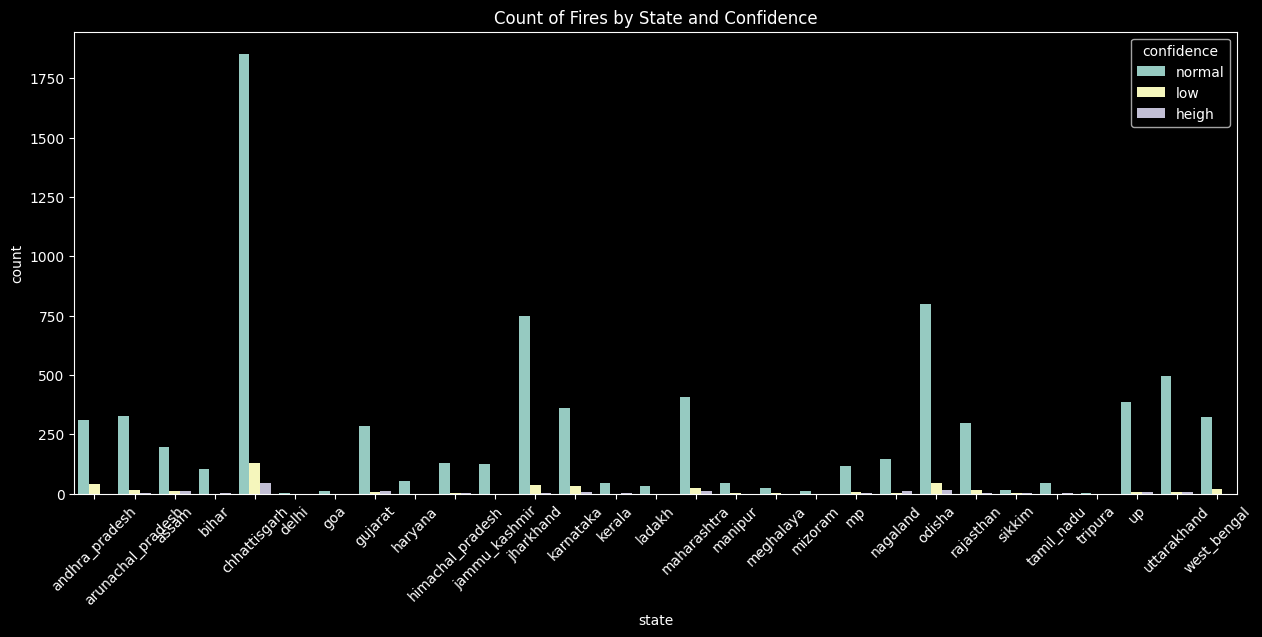

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(data=p, x='state', y='count', hue='confidence')
plt.xticks(rotation=45)
plt.title("Count of Fires by State and Confidence")
plt.show()

In [72]:
p

,state,confidence,count
0,andhra_pradesh,normal,309
1,andhra_pradesh,low,41
2,arunachal_pradesh,normal,327
3,arunachal_pradesh,low,16
4,arunachal_pradesh,heigh,4
...,...,...,...
64,uttarakhand,normal,495
65,uttarakhand,heigh,7
66,uttarakhand,low,6
67,west_bengal,normal,322


In [76]:
d=p.groupby('state')['count'].sum().to_dict()
d

{'andhra_pradesh': 350,
 'arunachal_pradesh': 347,
 'assam': 221,
 'bihar': 108,
 'chhattisgarh': 2026,
 'delhi': 3,
 'goa': 12,
 'gujarat': 305,
 'haryana': 54,
 'himachal_pradesh': 136,
 'jammu_kashmir': 129,
 'jharkhand': 792,
 'karnataka': 400,
 'kerala': 47,
 'ladakh': 34,
 'maharashtra': 444,
 'manipur': 49,
 'meghalaya': 27,
 'mizoram': 11,
 'mp': 131,
 'nagaland': 166,
 'odisha': 865,
 'rajasthan': 315,
 'sikkim': 22,
 'tamil_nadu': 50,
 'tripura': 5,
 'up': 401,
 'uttarakhand': 508,
 'west_bengal': 341}

In [84]:
d=dict(sorted(d.items(),key=lambda x:x[1],reverse=True)[:5])

In [85]:
d

{'chhattisgarh': 2026,
 'odisha': 865,
 'jharkhand': 792,
 'uttarakhand': 508,
 'maharashtra': 444}

<Axes: >

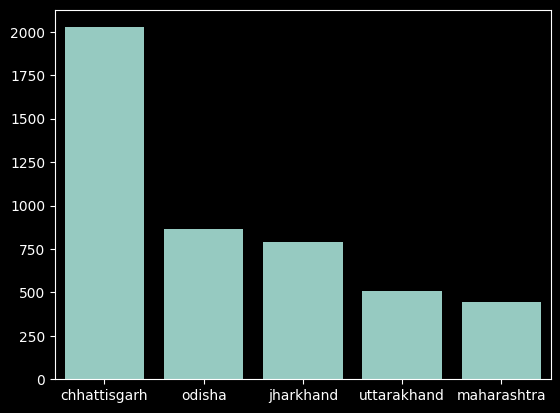

In [86]:
sns.barplot(d)

In [87]:
p

,state,confidence,count
0,andhra_pradesh,normal,309
1,andhra_pradesh,low,41
2,arunachal_pradesh,normal,327
3,arunachal_pradesh,low,16
4,arunachal_pradesh,heigh,4
...,...,...,...
64,uttarakhand,normal,495
65,uttarakhand,heigh,7
66,uttarakhand,low,6
67,west_bengal,normal,322


In [88]:
pp=p[p['confidence']=='heigh']

In [89]:
dd=pp.groupby('state')['count'].sum().to_dict()
dd

{'arunachal_pradesh': 4,
 'assam': 10,
 'bihar': 2,
 'chhattisgarh': 44,
 'gujarat': 11,
 'himachal_pradesh': 3,
 'jammu_kashmir': 1,
 'jharkhand': 3,
 'karnataka': 6,
 'kerala': 3,
 'maharashtra': 13,
 'mp': 3,
 'nagaland': 13,
 'odisha': 17,
 'rajasthan': 4,
 'sikkim': 5,
 'tamil_nadu': 2,
 'up': 8,
 'uttarakhand': 7}

In [90]:
dd=dict(sorted(dd.items(),key=lambda x:x[1],reverse=True)[:5])

In [91]:
dd

{'chhattisgarh': 44,
 'odisha': 17,
 'maharashtra': 13,
 'nagaland': 13,
 'gujarat': 11}

<Axes: >

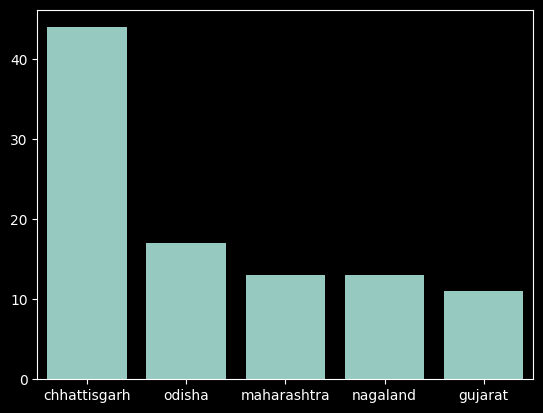

In [92]:
sns.barplot(dd)

In [93]:
p

,state,confidence,count
0,andhra_pradesh,normal,309
1,andhra_pradesh,low,41
2,arunachal_pradesh,normal,327
3,arunachal_pradesh,low,16
4,arunachal_pradesh,heigh,4
...,...,...,...
64,uttarakhand,normal,495
65,uttarakhand,heigh,7
66,uttarakhand,low,6
67,west_bengal,normal,322


In [94]:
ppp=p[p['state']=='andhra_pradesh']

In [95]:
ppp

,state,confidence,count
0,andhra_pradesh,normal,309
1,andhra_pradesh,low,41


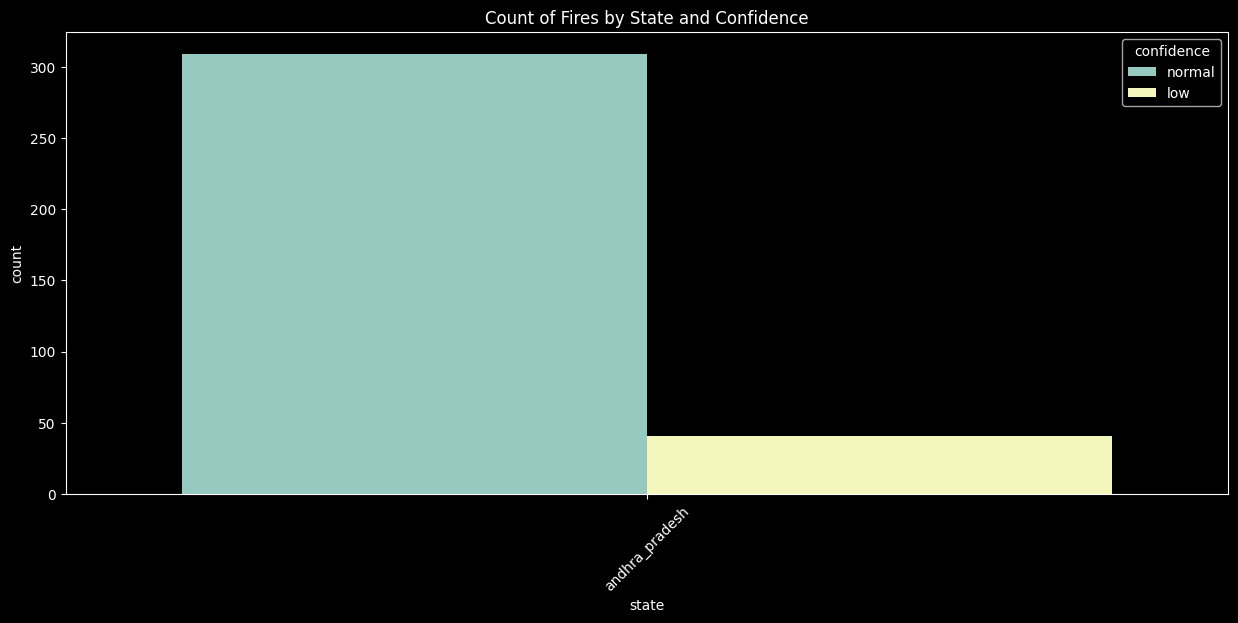

In [96]:
plt.figure(figsize=(15,6))
sns.barplot(data=ppp, x='state', y='count', hue='confidence')
plt.xticks(rotation=45)
plt.title("Count of Fires by State and Confidence")
plt.show()

In [97]:
df

,latitude,longitude,acq_date,acq_time,confidence,geometry,state
57,18.68706,83.47845,2026-01-12,656,normal,POINT (83.47845 18.68706),chhattisgarh
60,18.97167,82.02782,2026-01-12,656,normal,POINT (82.02782 18.97167),chhattisgarh
61,18.97433,82.02843,2026-01-12,656,normal,POINT (82.02843 18.97433),chhattisgarh
65,19.18992,82.50053,2026-01-12,656,normal,POINT (82.50053 19.18992),chhattisgarh
66,19.19384,82.49641,2026-01-12,656,normal,POINT (82.49641 19.19384),chhattisgarh
...,...,...,...,...,...,...,...
9927,32.75265,72.76534,2026-01-16,906,normal,POINT (72.76534 32.75265),jammu_kashmir
9928,32.75431,72.76066,2026-01-16,906,normal,POINT (72.76066 32.75431),jammu_kashmir
9929,32.76192,72.71856,2026-01-16,906,low,POINT (72.71856 32.76192),jammu_kashmir
9930,32.76220,72.72359,2026-01-16,906,normal,POINT (72.72359 32.7622),jammu_kashmir


In [100]:
ddf=df[df['state']=='chhattisgarh']
ddf

,latitude,longitude,acq_date,acq_time,confidence,geometry,state
57,18.68706,83.47845,2026-01-12,656,normal,POINT (83.47845 18.68706),chhattisgarh
60,18.97167,82.02782,2026-01-12,656,normal,POINT (82.02782 18.97167),chhattisgarh
61,18.97433,82.02843,2026-01-12,656,normal,POINT (82.02843 18.97433),chhattisgarh
65,19.18992,82.50053,2026-01-12,656,normal,POINT (82.50053 19.18992),chhattisgarh
66,19.19384,82.49641,2026-01-12,656,normal,POINT (82.49641 19.19384),chhattisgarh
...,...,...,...,...,...,...,...
9310,22.39834,82.32122,2026-01-16,722,normal,POINT (82.32122 22.39834),chhattisgarh
9375,22.87588,81.92570,2026-01-16,722,normal,POINT (81.9257 22.87588),chhattisgarh
9376,22.87779,81.92618,2026-01-16,722,normal,POINT (81.92618 22.87779),chhattisgarh
9380,22.98054,81.19531,2026-01-16,722,normal,POINT (81.19531 22.98054),chhattisgarh


In [101]:
time_df=ddf.groupby('acq_date')['state'].count()
time_df

acq_date
2026-01-12    453
2026-01-13    371
2026-01-14    387
2026-01-15    528
2026-01-16    287
Name: state, dtype: int64

<Axes: xlabel='acq_date', ylabel='state'>

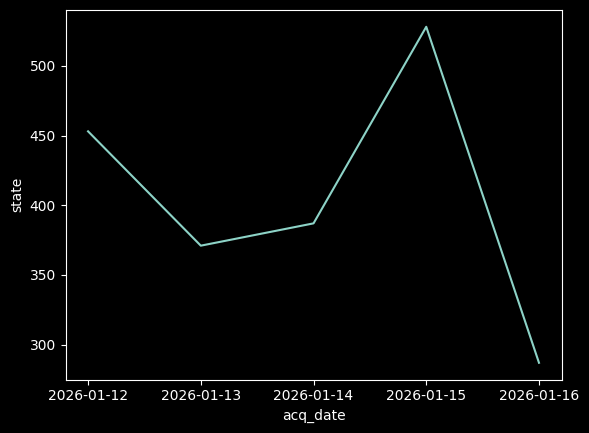

In [102]:
sns.lineplot(time_df)